In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()
df.isnull().sum()
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
df['price_range'].value_counts()
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

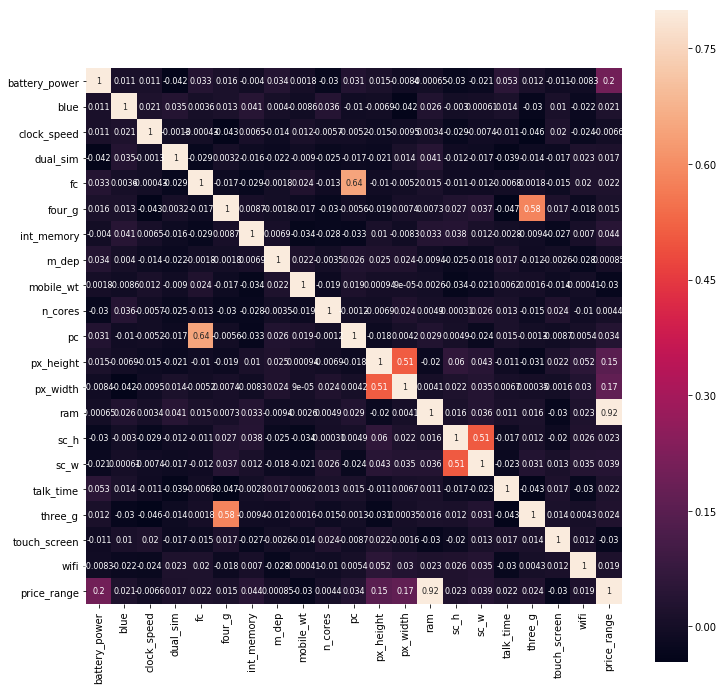

In [5]:
corrmat = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corrmat, square=True, annot=True , annot_kws={'size':8}, vmax=0.8)

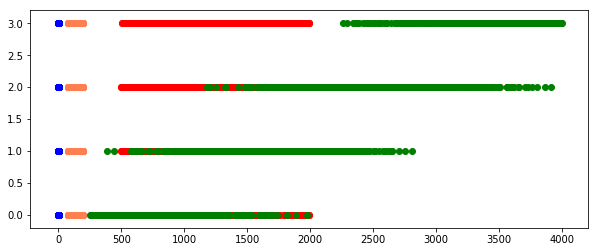

In [6]:
plt.subplots(figsize=(10,4))
plt.scatter(y=df['price_range'], x = df['battery_power'], color='red')
plt.scatter(y=df['price_range'], x = df['ram'], color='green')
plt.scatter(y=df['price_range'], x = df['n_cores'], color='blue')
plt.scatter(y=df['price_range'], x = df['mobile_wt'], color='coral')

In [7]:
# label 나누기
yt = np.array(df['price_range'])
xt = df.drop(['price_range'], axis=1)
xt = np.array(xt)

In [8]:
# MinMaxScale
scaler = MinMaxScaler()
xt = scaler.fit_transform(xt)

In [9]:
# shape 파악
xt.shape
yt.shape

(2000,)

In [10]:
# 트레인, 테스트 데이더 나누기
xtrain, xtest, ytrain, ytest = train_test_split(xt, yt, test_size = 0.2, random_state = 42)

In [11]:
print('shapeof x train : ', xtrain.shape)
print('shapeof x train : '+str(xtrain.shape))

shapeof x train :  (1600, 20)
shapeof x train : (1600, 20)


In [12]:
# Linear SVM을 위한 적절한 C값 검색

for thisC in [1,3,5,10,40,60,80,100]:
    # 객체 생성
    svc = SVC(kernel = 'linear', C = thisC)
    # 모델 생성 
    model = svc.fit(xtrain, ytrain)
    # 모델 평가 
    scoreTrain = model.score(xtrain, ytrain)
    scoreTest = model.score(xtest, ytest)
    
    print('선형 SVM C:{} \ntraining score :{:.2f}, test score :{:.2f}, \n'.format(thisC, scoreTrain, scoreTest))

선형 SVM C:1 
training score :0.95, test score :0.96, 

선형 SVM C:3 
training score :0.96, test score :0.98, 

선형 SVM C:5 
training score :0.97, test score :0.97, 

선형 SVM C:10 
training score :0.98, test score :0.97, 

선형 SVM C:40 
training score :0.98, test score :0.96, 

선형 SVM C:60 
training score :0.98, test score :0.96, 

선형 SVM C:80 
training score :0.98, test score :0.97, 

선형 SVM C:100 
training score :0.98, test score :0.97, 



In [13]:
## 교차검증
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 객체와 모델 생성
model = SVC(kernel = 'linear', C = 20).fit(xtrain,ytrain)


scores = cross_val_score(model, xtrain, ytrain, cv = 5)
# KFold 적용
st_scores = cross_val_score(model, xtrain, ytrain, cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True))

print(scores)
print(st_scores)

print(scores.mean())
print(st_scores.mean())

[0.95015576 0.96261682 0.94392523 0.92789969 0.97169811]
[0.97819315 0.92834891 0.93457944 0.97805643 0.96226415]
0.9512591238085129
0.9562884145205576


In [14]:
# LinearSVC <- 속도면에서 빠름
# SVC -> 느림
# 실제 작업시 두 모델을 비교해 사용 

from sklearn.svm import LinearSVC

for thisC in [1,3,5,10,40,60,80,100]:
    model2 = LinearSVC(C=thisC).fit(xtrain, ytrain)
    
    scoreTrain = model2.score(xtrain, ytrain)
    scoreTest = model2.score(xtest, ytest)
    
    print('선형 SVM C:{} \ntraining score :{:.2f}, test score :{:.2f}, \n'.format(thisC, scoreTrain, scoreTest))

선형 SVM C:1 
training score :0.85, test score :0.84, 

선형 SVM C:3 
training score :0.86, test score :0.85, 

선형 SVM C:5 
training score :0.87, test score :0.87, 

선형 SVM C:10 
training score :0.87, test score :0.88, 

선형 SVM C:40 
training score :0.85, test score :0.85, 

선형 SVM C:60 
training score :0.85, test score :0.83, 

선형 SVM C:80 
training score :0.82, test score :0.83, 

선형 SVM C:100 
training score :0.82, test score :0.80, 



In [15]:
# RBF 커널 SVM, C와 gamma 퍼러미터 사용 
for thisGamma in [.1, .25, .5, 1] :
    for thisC in [1,5,10,20,40,100]:
        model3 = SVC(kernel = 'rbf', C = thisC, gamma = thisGamma).fit(xtrain, ytrain)
        
        train_score = model3.score(xtrain, ytrain)
        test_score = model3.score(xtest, ytest)
        
        print('Gamma : {:.2f}, C : {:.2f} \ntrain_score : {:.2f}, test_score : {:.2f} \n'.format(thisGamma, thisC, train_score,test_score ))
    print('\n')   

Gamma : 0.10, C : 1.00 
train_score : 0.93, test_score : 0.90 

Gamma : 0.10, C : 5.00 
train_score : 0.96, test_score : 0.91 

Gamma : 0.10, C : 10.00 
train_score : 0.98, test_score : 0.91 

Gamma : 0.10, C : 20.00 
train_score : 0.99, test_score : 0.91 

Gamma : 0.10, C : 40.00 
train_score : 0.99, test_score : 0.90 

Gamma : 0.10, C : 100.00 
train_score : 1.00, test_score : 0.91 



Gamma : 0.25, C : 1.00 
train_score : 0.96, test_score : 0.89 

Gamma : 0.25, C : 5.00 
train_score : 0.99, test_score : 0.87 

Gamma : 0.25, C : 10.00 
train_score : 1.00, test_score : 0.90 

Gamma : 0.25, C : 20.00 
train_score : 1.00, test_score : 0.90 

Gamma : 0.25, C : 40.00 
train_score : 1.00, test_score : 0.90 

Gamma : 0.25, C : 100.00 
train_score : 1.00, test_score : 0.90 



Gamma : 0.50, C : 1.00 
train_score : 0.98, test_score : 0.83 

Gamma : 0.50, C : 5.00 
train_score : 1.00, test_score : 0.85 

Gamma : 0.50, C : 10.00 
train_score : 1.00, test_score : 0.85 

Gamma : 0.50, C : 20.00 


In [16]:
from sklearn.model_selection import GridSearchCV

# gamma값과 C값을 딕셔너리 형태로 저장 
param = {'C':[1,5,10,20,40,100],
         'gamma':[.1, .25, .5, 1]}

GS = GridSearchCV(SVC(kernel='rbf'), param, cv = 5)

GS.fit(xtrain, ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'C': 5, 'gamma': 0.1}
0.90375


In [17]:
test = test.drop(['id'], axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [18]:
test = scaler.fit_transform(test)

model = SVC(kernel='rbf', C=5, gamma=.1).fit(xtrain, ytrain)

prediction = model.predict(test)

pd.DataFrame({'price_range':prediction})

,price_range
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,1
998,2


# 타이타닉

In [96]:
df = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.isnull().sum()
# Age 177 / Cabin 687 / Embarked 2
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [98]:
# 나이 결측치 제거를 위해 호칭 추출
import re

pat = re.compile(', (\w+).')

title = list()
for i in range(df.shape[0]) : 
    
    title.append(re.search(pat, df['Name'][i]).group(1))

test_title = list()
for i in range(test.shape[0]) : 
    
    test_title.append(re.search(pat, test['Name'][i]).group(1))

In [99]:
df['title'] = title
df
test['title'] = test_title
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [100]:
# 나이 결측치를 호칭그룹의 나이 평균으로 대체한 데이터 프래임 생성

df_fill = df.copy()
test_fill = test.copy()

fill_mean_func = lambda x: x.fillna(x.mean())

df_fill['Age'] = df.groupby('title')['Age'].apply(fill_mean_func)
test_fill['Age'] = df.groupby('title')['Age'].apply(fill_mean_func)

df_fill.isnull().sum()
test_fill.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            0
dtype: int64

In [101]:
# Embarked 결측치 제거
df_fill['Embarked'] = df_fill['Embarked'].fillna('unkonwn')
df_fill.isnull().sum()

test_fill['Embarked'] = test_fill['Embarked'].fillna('unkonwn')
test_fill.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
title            0
dtype: int64

In [102]:
# Sex 컬럼 값 대체
df_fill['Sex'] = np.where(df_fill['Sex']=='male',0 , 1)
df_fill

test_fill['Sex'] = np.where(test_fill['Sex']=='male',0 , 1)
test_fill

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",0,22.000000,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,38.000000,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,26.000000,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,35.000000,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,35.000000,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,32.368090,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,44.000000,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",0,35.898148,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",0,34.000000,0,0,359309,8.0500,NaN,S,Mr


In [103]:
df_fill.drop(['PassengerId','Name','Ticket', 'Cabin', 'title'], axis = 1 , inplace=True)
test_fill.drop(['PassengerId','Name','Ticket', 'Cabin', 'title'], axis = 1 , inplace=True)

In [107]:
# Embarked 열 원핫인코딩
df_fill_dummies = pd.get_dummies(data=df_fill, columns=['Embarked'])
df_fill_dummies.head()

test_fill_dummies = pd.get_dummies(data=test_fill, columns=['Embarked'])
test_fill_dummies.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,0,0,0,1,0
1,3,1,38.0,1,0,0,0,1
2,2,0,26.0,0,0,0,1,0
3,3,0,35.0,0,0,0,0,1
4,3,1,35.0,1,1,0,0,1


In [108]:
# test의 Fare의 결측치 발견 -> 평균치로 대체
#test_fill_dummies['Fare'] = test_fill_dummies['Fare'].fillna(test_fill_dummies['Fare'].mean())

#test_fill_dummies.isnull().sum()

In [109]:
label = df_fill_dummies['Survived']
df_fill_dummies.drop('Survived', axis=1, inplace=True)

In [110]:

df_fill_dummies.drop('Embarked_unkonwn', axis=1, inplace=True)

In [111]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [112]:
df_fill_dummies

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,0,0,1
1,1,1,38.000000,1,0,1,0,0
2,3,1,26.000000,0,0,0,0,1
3,1,1,35.000000,1,0,0,0,1
4,3,0,35.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0,0,1
887,1,1,19.000000,0,0,0,0,1
888,3,1,21.773973,1,2,0,0,1
889,1,0,26.000000,0,0,1,0,0


In [113]:
test_fill_dummies

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,0,0,0,1,0
1,3,1,38.000000,1,0,0,0,1
2,2,0,26.000000,0,0,0,1,0
3,3,0,35.000000,0,0,0,0,1
4,3,1,35.000000,1,1,0,0,1
...,...,...,...,...,...,...,...,...
413,3,0,32.368090,0,0,0,0,1
414,1,1,44.000000,0,0,1,0,0
415,3,0,35.898148,0,0,0,0,1
416,3,0,34.000000,0,0,0,0,1


In [114]:
# 데이터 정규화
scaler = MinMaxScaler()

df_fill_dummies_sc = scaler.fit_transform(np.array(df_fill_dummies))
test_fill_dummies_sc = scaler.fit_transform(np.array(test_fill_dummies))

In [161]:
from sklearn.model_selection import GridSearchCV

# gamma값과 C값을 딕셔너리 형태로 저장 
param = {'C':[1,5,10,20,40,100],
         'gamma':[.1, .25, .5, 1]}

GS = GridSearchCV(SVC(kernel='rbf'), param, cv = 5)

GS.fit(df_fill_dummies_sc, label)

print(GS.best_params_)
print(GS.best_score_)

# {'C': 20, 'gamma': 0.5}
# 0.8237934904601572

{'C': 20, 'gamma': 0.5}
0.8181818181818182


In [116]:
test_fill_dummies_sc

array([[1.        , 0.        , 0.30169588, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.52971355, ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.3587003 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.49975984, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.47270913, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 0.24469146, ..., 1.        , 0.        ,
        0.        ]])

In [117]:
df_fill_dummies_sc

array([[1.        , 0.        , 0.27117366, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.4722292 , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32143755, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.26833341, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.32143755, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.39683338, ..., 0.        , 1.        ,
        0.        ]])

In [143]:
?SVC

In [162]:
model = SVC(kernel='rbf', C=20, gamma=0.5).fit(df_fill_dummies_sc, label)

prediction = model.predict(test_fill_dummies_sc)

prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [163]:
res = pd.read_csv('data/titanic/gender_submission.csv')
res['Survived'] = prediction
res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [164]:
res.Survived.value_counts() # 0    304  1    114

0    304
1    114
Name: Survived, dtype: int64

In [151]:
res.to_csv('res.csv', index=False)

In [121]:
from sklearn import tree

In [129]:
dataTrain, dataTest, lableTrain, lableTest = train_test_split(df_fill_dummies_sc,label,test_size = 0.3, random_state=3)

In [130]:
# 3, 4, 5, 6, 10, 생략
depth = [3,4,5,6,7,8,9,10]
for i in range(len(depth)) :
    # 모델객체 생성
    dt2 = tree.DecisionTreeClassifier(max_depth = depth[i])

    # 모델 fit
    dt2.fit(dataTrain, lableTrain)

    dt2_sc_train = dt2.score(dataTrain, lableTrain)
    dt2_sc_test = dt2.score(dataTest, lableTest)
    
    print('depth : ',depth[i])
    print('트레이닝 스코어',dt2_sc_train)
    print('테스트 스코어',dt2_sc_test)

depth :  3
트레이닝 스코어 0.8362760834670947
테스트 스코어 0.753731343283582
depth :  4
트레이닝 스코어 0.8491171749598716
테스트 스코어 0.7649253731343284
depth :  5
트레이닝 스코어 0.8587479935794543
테스트 스코어 0.7686567164179104
depth :  6
트레이닝 스코어 0.8731942215088283
테스트 스코어 0.8134328358208955
depth :  7
트레이닝 스코어 0.8924558587479936
테스트 스코어 0.7798507462686567
depth :  8
트레이닝 스코어 0.9036918138041734
테스트 스코어 0.8022388059701493
depth :  9
트레이닝 스코어 0.9197431781701445
테스트 스코어 0.7835820895522388
depth :  10
트레이닝 스코어 0.9309791332263242
테스트 스코어 0.7798507462686567


In [131]:
model = tree.DecisionTreeClassifier(max_depth=8)

model.fit(df_fill_dummies_sc,label)

train_sc = model.score(df_fill_dummies_sc, label)

prediction = model.predict(test_fill_dummies_sc)
    
    
res = pd.read_csv('data/titanic/gender_submission.csv')
res['Survived'] = prediction
res

res.Survived.value_counts()

0    284
1    134
Name: Survived, dtype: int64

In [132]:
res.to_csv('res.csv', index=False)